# CREDIT CARD FRAUD ANALYSIS

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly import data
from plotly.subplots import make_subplots
import plotly.io as pio
import kaleido
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Load the files

In [2]:
path = r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions'
df=pd.read_csv(os.path.join(path,'Data', 'Raw Data', 'credit_card_transactions.csv'))
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

#### Check for Missing Values

In [3]:
print(df.isnull().sum())

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


##### There are missing values in the Zip Code of the merchant. I will handle them if needed.

#### Check for duplicates

In [4]:
print(df.duplicated().sum())

0


##### There are no duplicated entries in the data.

#### Check the Data types

In [5]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

#### Modify the data types as needed.

In [6]:
# Transaction date to datetime
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
# ZIP to object
df['zip']=df['zip'].astype('object')


#### Create three new columns with the hour of the transaction, the day and the month.

In [7]:
df['day_week']=df['trans_date_trans_time'].dt.day_name()
df['month']=df['trans_date_trans_time'].dt.month_name()
df['hour_transaction']=df['trans_date_trans_time'].dt.hour

### Spending Behavior

#### Filter the dataframe on not fraudulent transactions

In [8]:
# df0 will be the not fraudulent transactions
df0=df[(df['is_fraud'])==0]
df0.shape

(1289169, 27)

#### Spending by gender

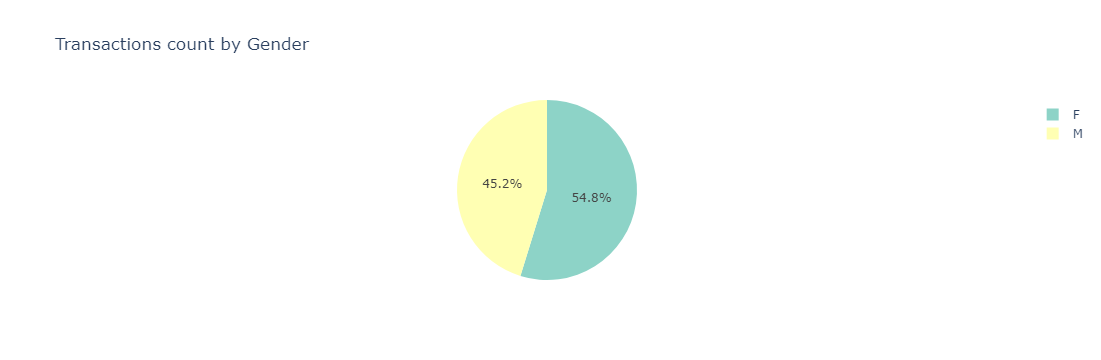

C:\Users\Jaime Andres Suarez\anaconda3\envs\newenv1\Lib\site-packages\kaleido\scopes\base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



In [9]:
gendercount=df0['gender'].value_counts()
fig= px.pie(values=gendercount, names=gendercount.index, title="Transactions count by Gender",
           color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Transactions count by Gender.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

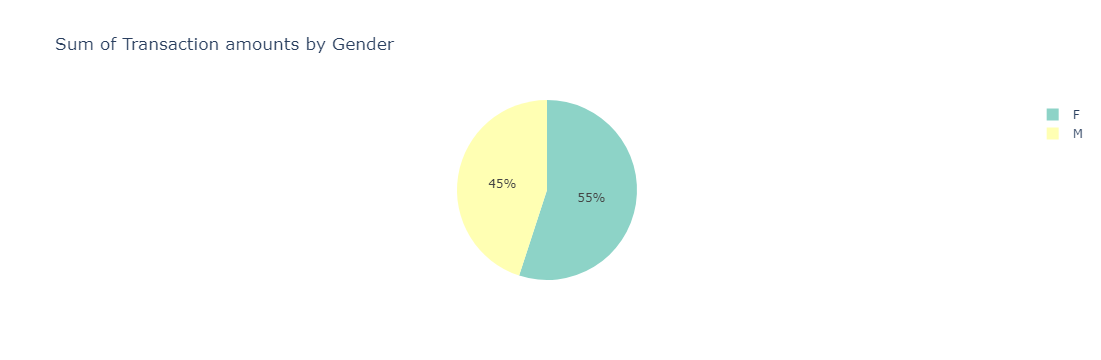

In [10]:
gendersum=df0.groupby('gender')['amt'].sum().reset_index()
fig=px.pie(gendersum, values='amt', names='gender', title='Sum of Transaction amounts by Gender',
          color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Sum of Transaction amounts by Gender.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

#### Histogram of Transaction Amounts

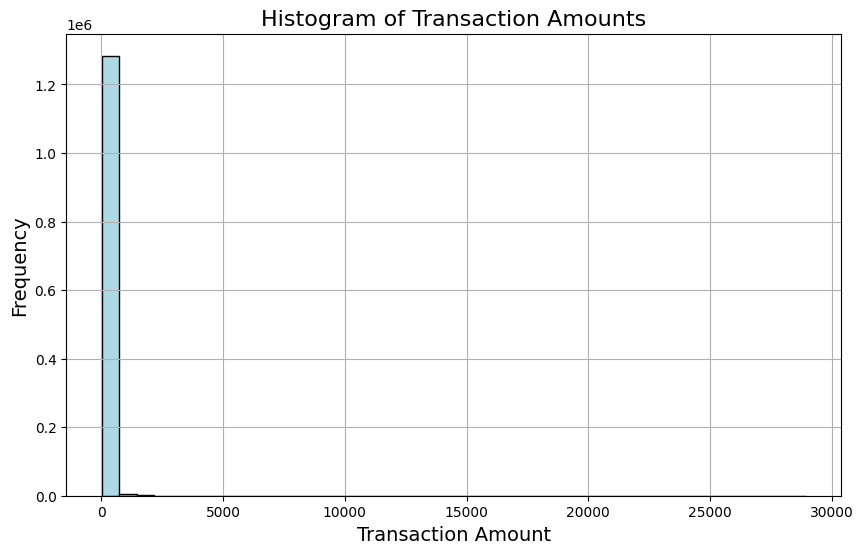

In [84]:
plt.figure(figsize=(10,6))
plt.hist(df0['amt'],bins=40,color='lightblue',edgecolor='black')
plt.title('Histogram of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Histogram of Transaction Amounts.png')
plt.savefig(filename,bbox_inches='tight')

plt.show()



#### Box plot of Transaction Amounts

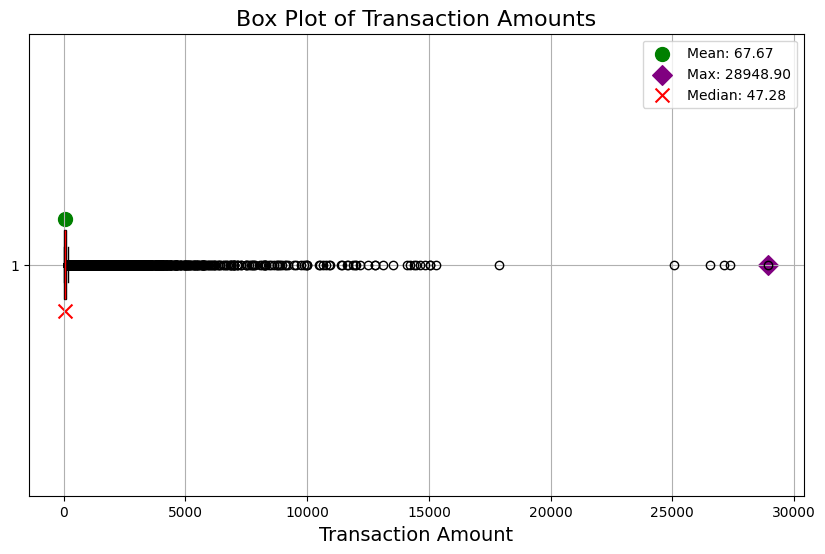

In [111]:
# Calculate statistics
median = np.median(df0['amt'])
mean = np.mean(df0['amt'])
max_val = np.max(df0['amt'])

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df0['amt'], 
            vert=False,  # Horizontal box plot
            patch_artist=True,  # Fill the box with color
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red')
            )

# Add annotations for median, mean, and max
plt.scatter(mean, 1.1, color='green', marker='o', s=100, label=f'Mean: {mean:.2f}')
plt.scatter(max_val, 1, color='purple', marker='D', s=100, label=f'Max: {max_val:.2f}')
plt.scatter(median, 0.9, color='red', marker='x', s=100, label=f'Median: {median:.2f}')

# Customize labels and title
plt.title('Box Plot of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)

# Display legend
plt.legend()

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Box Plot of Transaction Amounts.png')
plt.savefig(filename,bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

#### Transactions of less than 100

In [88]:
# Create a new dataframe
df100= pd.DataFrame({'amount':df0['amt'],'label':['Less than 100' if x < 100 else 'More than 100' for x in df0['amt']]})

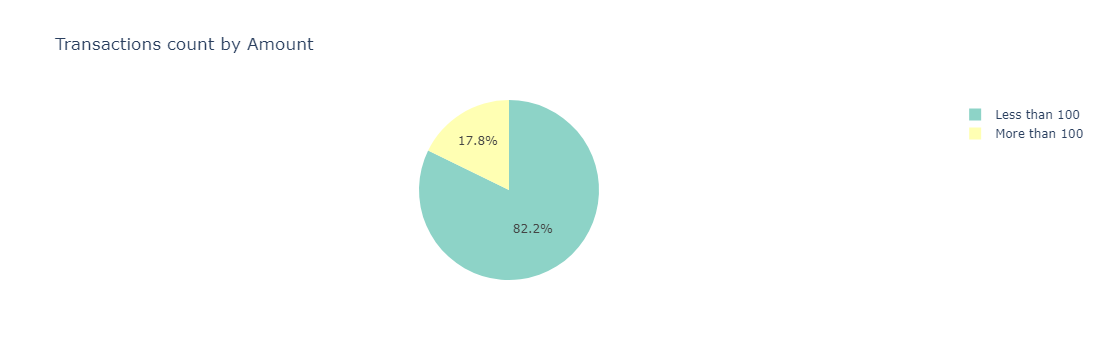

In [90]:
# Pie Chart
fig= px.pie(values=amtcount, names=amtcount.index, title="Transactions count by Amount",
           color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Transactions count by Amount.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

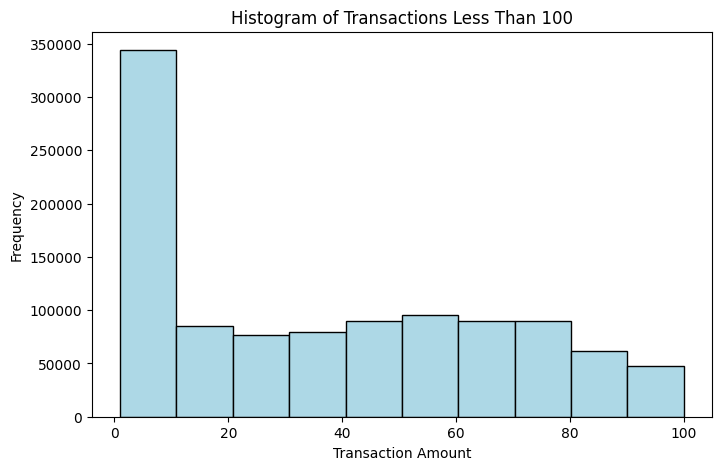

In [92]:
# Histogram of amount when less than 100

# Filter transaction when less than 100
dflessthan100=df100[df100['amount']<100]

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(dflessthan100['amount'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Transactions Less Than 100')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Histogram of Transactions Less Than 100.png')
plt.savefig(filename,bbox_inches='tight')

plt.show()

#### Sum of Transactions by Day of the week

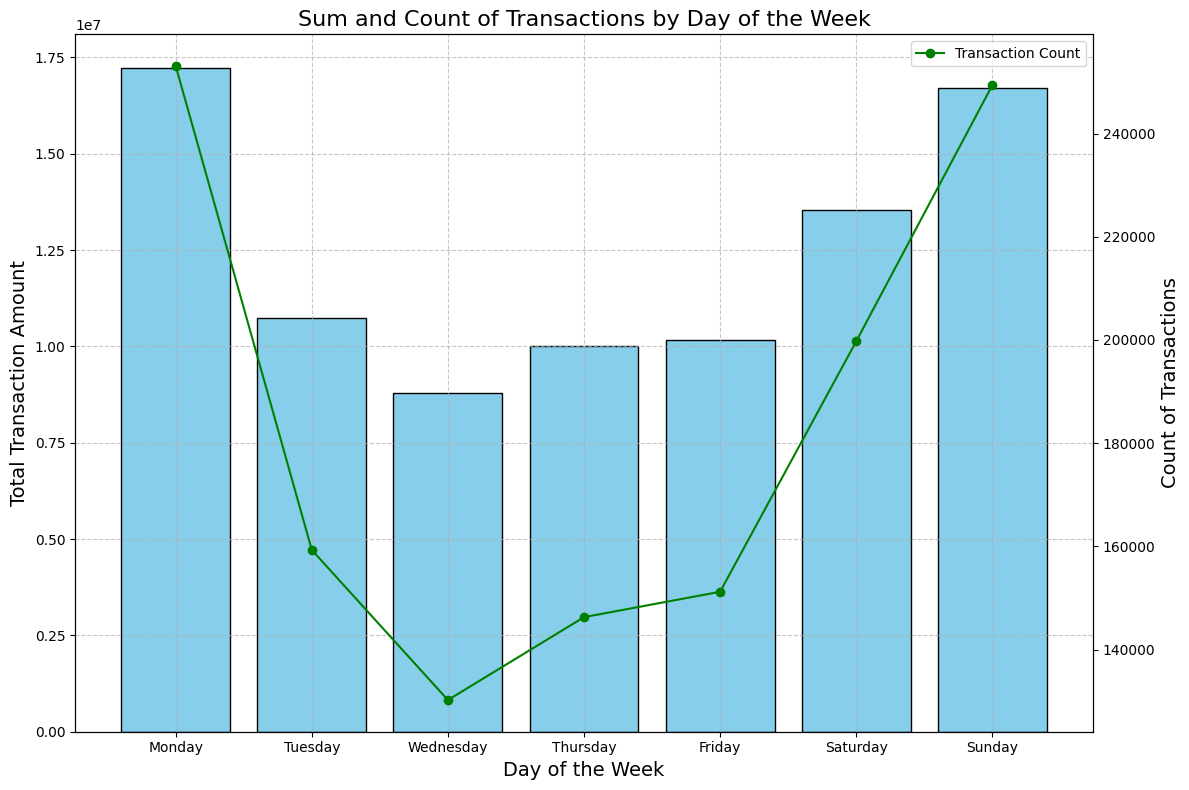

In [112]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_day = df0.groupby('day_week')['amt'].sum()
count_by_day = df0.groupby('day_week')['amt'].count()

# Define the correct order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the series to ensure proper sorting
sum_by_day = sum_by_day.reindex(days_order)
count_by_day = count_by_day.reindex(days_order)

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_day.index, sum_by_day.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_day.index, count_by_day.values, marker='o', linestyle='-', color='green', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Transactions by Day of the Week', fontsize=16)
ax1.set_xlabel('Day of the Week', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)


# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum of Transaction Amounts by Day of the Week.png')
plt.savefig(filename)


# Show the plot
plt.show()


#### Sum of Transactions by hour

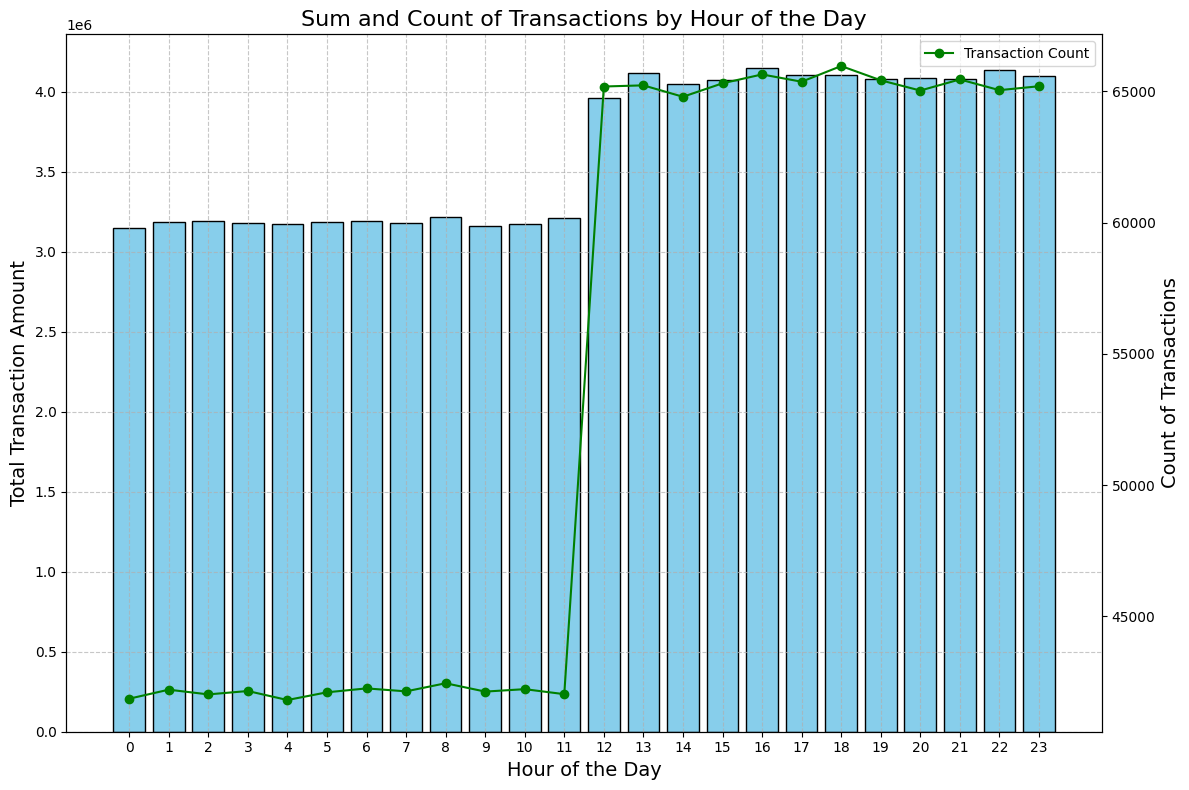

In [113]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_hour = df0.groupby('hour_transaction')['amt'].sum()
count_by_hour = df0.groupby('hour_transaction')['amt'].count()

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_hour.index, sum_by_hour.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_hour.index, count_by_hour.values, marker='o', linestyle='-', color='green', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Transactions by Hour of the Day', fontsize=16)
ax1.set_xlabel('Hour of the Day', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)

# Customize x-axis ticks
plt.xticks(range(24), fontsize=12)

# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum of Transaction Amounts by Hour of the Day.png')
plt.savefig(filename)


# Show the plot
plt.show()


#### Sum of Transactions by month

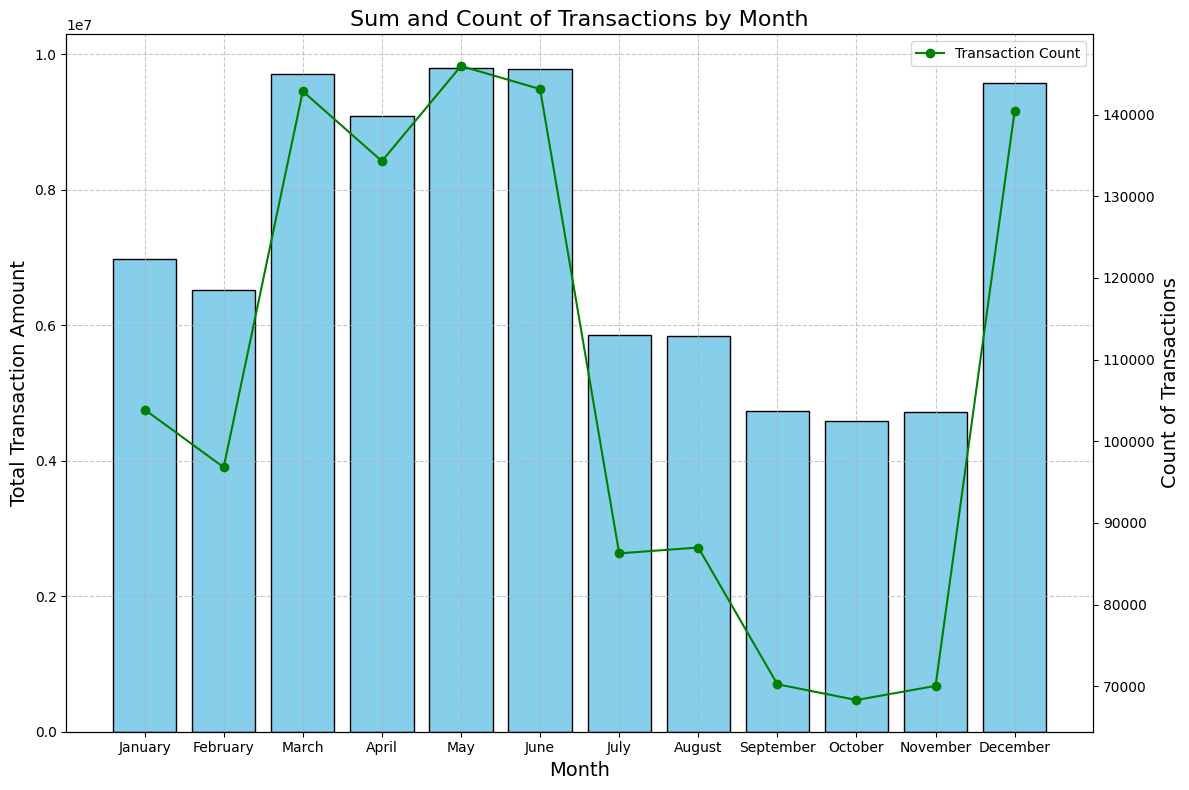

In [114]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_month = df0.groupby('month')['amt'].sum()
count_by_month = df0.groupby('month')['amt'].count()

# Define the correct order of days
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the series to ensure proper sorting
sum_by_month = sum_by_month.reindex(months_order)
count_by_month = count_by_month.reindex(months_order)

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_month.index, sum_by_month.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_month.index, count_by_month.values, marker='o', linestyle='-', color='green', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Transactions by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)

# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum of Transaction Amounts by Month.png')
plt.savefig(filename)


# Show the plot
plt.show()

#### Group by Month and Category

In [16]:
df_month_cat=df0.groupby(['category','month']).agg({'trans_num':'nunique','amt':'sum'}).reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df_month_cat['month']=pd.Categorical(df_month_cat['month'],categories=months_order, ordered=True)


##### Rename Categories

In [17]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [18]:
df_month_cat['category']=df_month_cat['category'].replace(renamedcategories)

##### Create a Crosstab with Month and Category

In [19]:
crosstab_df_month_cat=pd.crosstab(index=df_month_cat['month'], columns=df_month_cat['category'],values=df_month_cat['amt'],aggfunc=sum)
crosstab_df_month_cat

C:\Users\Jaime Andres Suarez\AppData\Local\Temp\ipykernel_11796\3123615702.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



category    Food and Dining  Entertainment  Gas and Transportation  \
month                                                                
January           373993.60      487621.56               668314.85   
February          348518.82      441006.76               631298.99   
March             514551.70      652012.53               912926.85   
April             493439.19      616658.78               873399.96   
May               526414.09      670721.56               940784.39   
June              503648.20      647682.92               944181.67   
July              307447.20      393394.17               560854.59   
August            321131.34      412826.44               565000.60   
September         257181.36      319172.88               450891.76   
October           248567.24      315123.62               436733.91   
November          257236.44      310029.86               453484.10   
December          502198.64      653103.69               906266.51   

category   Grocery in person  Grocery in website  Health and Fitness  \
month                                                                  
January           1108568.08           195578.23           386424.39   
February          1052145.81           187230.13           360104.91   
March             1559898.60           262024.66           523740.68   
April             1468258.22           254581.09           492884.23   
May               1575618.88           280060.52           513765.05   
June              1563834.96           271046.56           512602.91   
July               934916.89           160902.59           309500.36   
August             927675.90           167161.27           312410.43   
September          725925.26           128855.29           249066.21   
October            733259.28           127860.84           248935.47   
November           755725.65           132909.06           239727.78   
December          1511196.95           269572.62           501252.56   

category        Home  Kids and Pets  Miscelaneous in person  \
month                                                         
January    583862.74      517462.20               377253.59   
February   528086.92      491457.50               377369.42   
March      798690.51      716088.27               540696.55   
April      738344.52      680468.98               494412.69   
May        801068.79      736484.51               547558.29   
June       789289.75      715793.17               575672.79   
July       473819.14      437408.36               335556.31   
August     468964.49      434314.30               351165.94   
September  386583.56      358930.11               259302.38   
October    383353.55      347647.73               256988.28   
November   392814.72      363658.13               277940.16   
December   778077.76      699635.82               561095.08   

category   Miscelaneous in website  Personal Care  Shopping in person  \
month                                                                   
January                  366665.71      356539.21           665901.05   
February                 314584.93      332118.99           626694.37   
March                    493408.20      469755.59           982017.63   
April                    457534.81      452390.94           845411.88   
May                      501091.85      489496.47           967654.33   
June                     487200.76      487111.88          1012480.87   
July                     297507.87      287669.19           528698.83   
August                   295136.80      294940.93           548266.08   
September                239192.46      241804.98           476300.88   
October                  224868.14      231720.83           456699.09   
November                 245606.73      236396.09           477230.14   
December                 465644.24      467747.91           981393.37   

category   Shopping in website     Travel  
month                                      
January         

#### Plot a heatmap with Month and Category

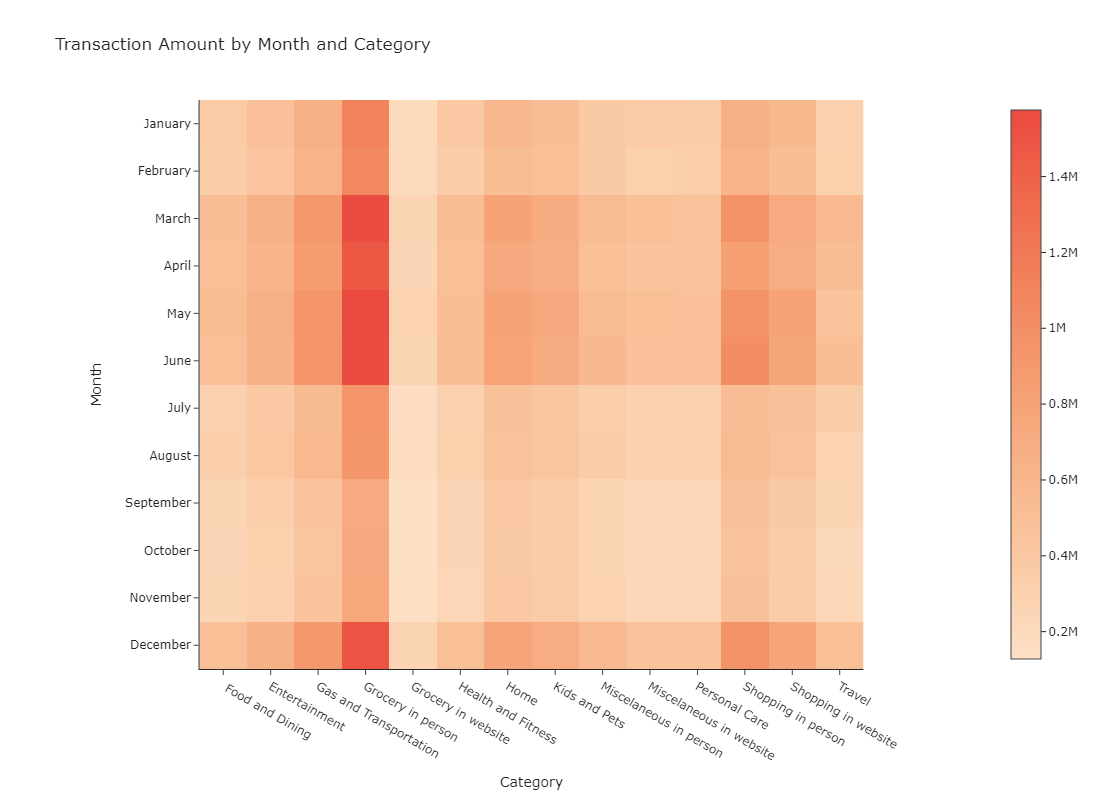

In [20]:
fig = px.imshow(crosstab_df_month_cat,text_auto=False,title= 'Transaction Amount by Month and Category',
                labels=dict(x='Category', y='Month'),template='simple_white',color_continuous_scale='Peach')
fig.update_layout(autosize=False, width=1000,height=800)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Transaction Amount by Month and Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

#### What are Credit Cards being used for?

##### Group by count of transactions

In [21]:
df_count_trans=df0.groupby(['category'])['trans_num'].agg('nunique').reset_index()
df_count_trans.sort_values(by=['trans_num'],ascending=False,inplace=True)
df_count_trans

category  trans_num
2    gas_transport     131041
6             home     122917
4      grocery_pos     121895
12    shopping_pos     115829
7        kids_pets     112796
11    shopping_net      95830
0    entertainment      93781
1      food_dining      91310
10   personal_care      90538
5   health_fitness      85746
9         misc_pos      79405
8         misc_net      62372
3      grocery_net      45318
13          travel      40391

##### Rename categories

In [22]:
print(df_count_trans['category'].unique())

['gas_transport' 'home' 'grocery_pos' 'shopping_pos' 'kids_pets'
 'shopping_net' 'entertainment' 'food_dining' 'personal_care'
 'health_fitness' 'misc_pos' 'misc_net' 'grocery_net' 'travel']


In [23]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [24]:
df_count_trans['category']=df_count_trans['category'].replace(renamedcategories)

##### Bar chart of Transactions count

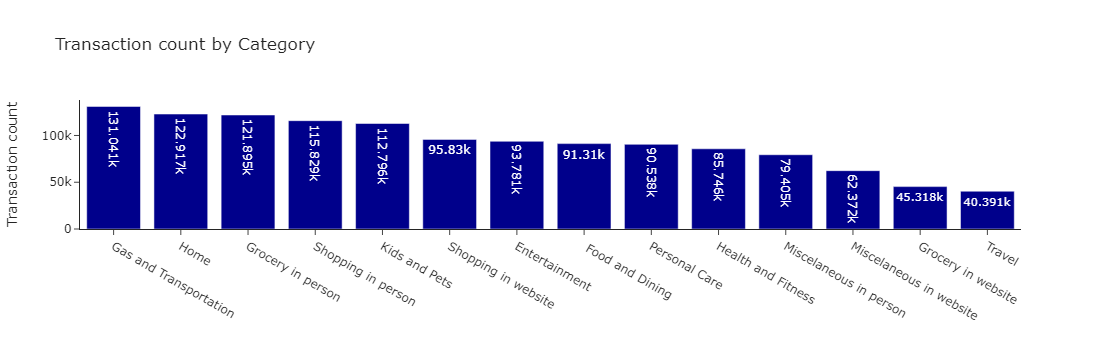

In [25]:
fig=px.bar(df_count_trans, x='category', y='trans_num',text_auto=True, 
           labels={'category':'', 'trans_num':'Transaction count'},
          title= 'Transaction count by Category',template= 'simple_white',color_discrete_sequence=['darkblue'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Transaction count by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Group by sum of transactions

In [26]:
df_sum_trans=df0.groupby(['category'])['amt'].agg('sum').reset_index()
df_sum_trans.sort_values(by=['amt'],ascending=False,inplace=True)
df_sum_trans

category          amt
4      grocery_pos  13917024.48
12    shopping_pos   8568748.52
2    gas_transport   8344138.18
6             home   7122956.45
11    shopping_net   6913425.97
7        kids_pets   6499349.08
0    entertainment   5919354.77
9         misc_pos   4955011.48
1      food_dining   4654327.82
5   health_fitness   4650414.98
13          travel   4515670.19
8         misc_net   4388442.50
10   personal_care   4347693.01
3      grocery_net   2437782.86

##### Rename categories

In [27]:
print(df_sum_trans['category'].unique())

['grocery_pos' 'shopping_pos' 'gas_transport' 'home' 'shopping_net'
 'kids_pets' 'entertainment' 'misc_pos' 'food_dining' 'health_fitness'
 'travel' 'misc_net' 'personal_care' 'grocery_net']


In [28]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [29]:
df_sum_trans['category']=df_sum_trans['category'].replace(renamedcategories)

##### Bar chart of Sum of transactions

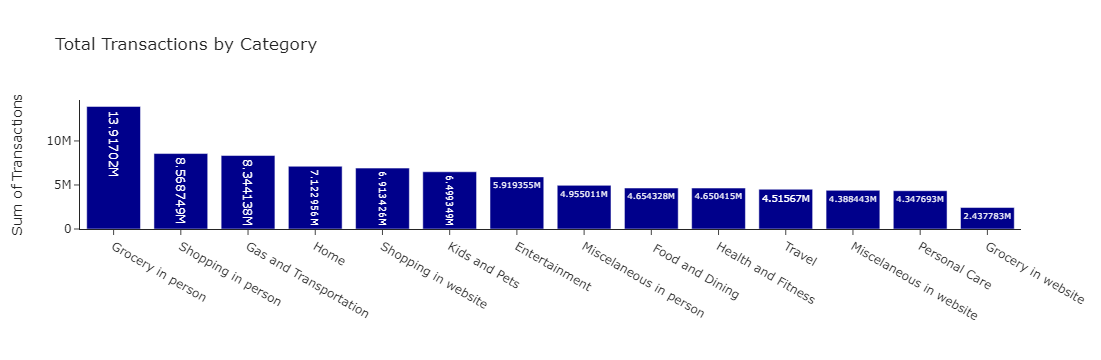

In [30]:
fig=px.bar(df_sum_trans, x='category', y='amt',text_auto=True, 
           labels={'category':'', 'amt':'Sum of Transactions'},
          title= 'Total Transactions by Category',template= 'simple_white',color_discrete_sequence=['darkblue'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Total Transactions by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Group by sum and count

In [31]:
df_avg=df0.groupby('category').agg({'amt':'sum','trans_num':'nunique'}).reset_index()
df_avg['Average Amount']=df_avg['amt']/df_avg['trans_num']
df_avg.sort_values(by=['Average Amount'],ascending=False,inplace=True)
df_avg

category          amt  trans_num  Average Amount
4      grocery_pos  13917024.48     121895      114.172234
13          travel   4515670.19      40391      111.798920
12    shopping_pos   8568748.52     115829       73.977575
11    shopping_net   6913425.97      95830       72.142606
8         misc_net   4388442.50      62372       70.359176
2    gas_transport   8344138.18     131041       63.675782
0    entertainment   5919354.77      93781       63.118913
9         misc_pos   4955011.48      79405       62.401757
6             home   7122956.45     122917       57.949319
7        kids_pets   6499349.08     112796       57.620386
5   health_fitness   4650414.98      85746       54.234775
3      grocery_net   2437782.86      45318       53.792817
1      food_dining   4654327.82      91310       50.972816
10   personal_care   4347693.01      90538       48.020643

##### Rename categories

In [32]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [33]:
df_avg['category']=df_avg['category'].replace(renamedcategories)

##### Bar chart of Sum of transactions

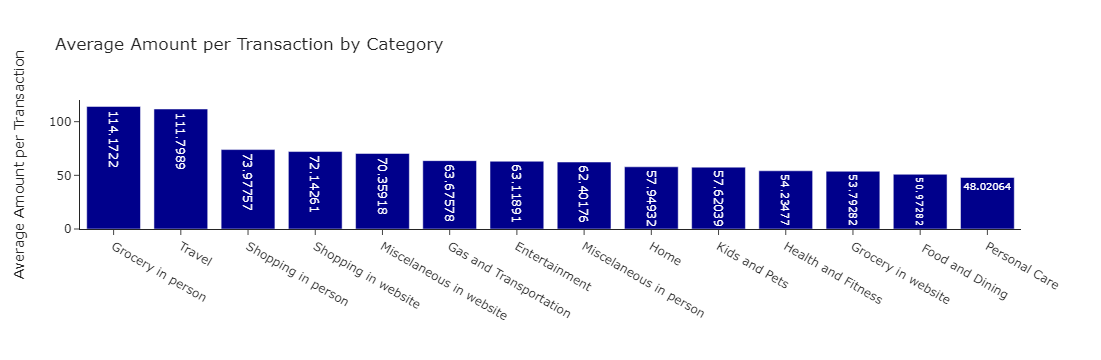

In [34]:
fig=px.bar(df_avg, x='category', y='Average Amount',text_auto=True, 
           labels={'category':'', 'Average Amount':'Average Amount per Transaction'},
          title= 'Average Amount per Transaction by Category',template= 'simple_white',color_discrete_sequence=['darkblue'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Average Amount per Transaction by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

#### Transaction count 

In [35]:
df_grouped=df0[['state','city','amt','trans_num','city_pop']]
df_grouped.sort_values(by=['city'],ascending=True,inplace=True)


C:\Users\Jaime Andres Suarez\AppData\Local\Temp\ipykernel_11796\447478705.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# Select a subset of the Dataframe
df_grouped=df0[['state','city','amt','trans_num','city_pop']]

# Number of transactions by state
transactions_by_state = df_grouped.groupby('state')['trans_num'].count()

# Amount of transactions by state
total_by_state = df_grouped.groupby('state')['amt'].sum()

# Remove duplicate cities to prevent double-counting population
unique_cities = df_grouped.drop_duplicates(subset=['city', 'state'])

# Sum the city population by state (after removing duplicates)
population_by_state = unique_cities.groupby('state')['city_pop'].sum()

# Calculate transactions per capita
transactions_per_capita = transactions_by_state / population_by_state

# Calculate ampunt per capita
total_per_capita = total_by_state / population_by_state

# Create a DataFrame to display results
df_location = pd.DataFrame({
    'state':transactions_by_state.index,
    'total_population': population_by_state.values,
    'transactions_state':transactions_by_state,
    'amount_by_state':total_by_state,
    'amount_per_capita': total_per_capita,
    'transactions_per_capita':transactions_per_capita
})
df_location.head()

state  total_population  transactions_state  amount_by_state  \
state                                                                
AK       AK               422                2084        126044.38   
AL       AL           1476502               40774       2570120.11   
AR       AR             90631               30966       2261329.02   
AZ       AZ           1334779               10733        789991.91   
CA       CA           7254731               56034       3967134.59   

       amount_per_capita  transactions_per_capita  
state                                              
AK            298.683365                 4.938389  
AL              1.740682                 0.027615  
AR             24.950944                 0.341671  
AZ              0.591852                 0.008041  
CA              0.546834                 0.007724

#### Geospatial Analysis

##### Transaction Count by State

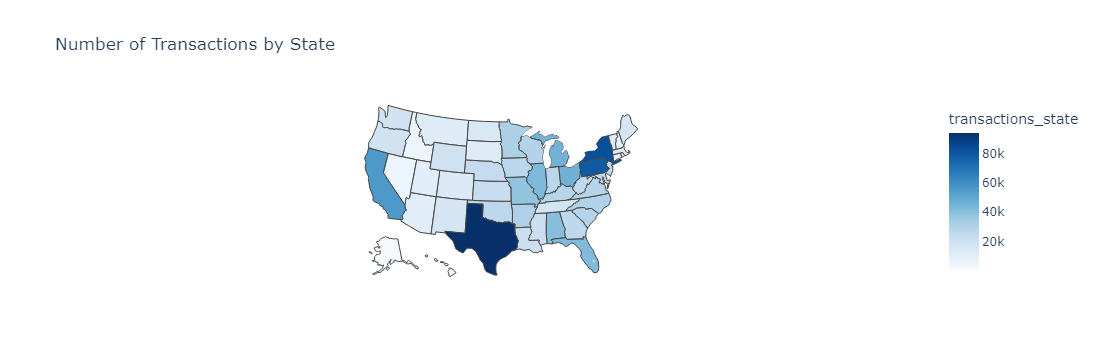

In [37]:
fig=px.choropleth(df_location, locations='state', locationmode='USA-states',color='transactions_state',
                 hover_name='state', hover_data='transactions_state', scope='usa',
                 color_continuous_scale='Blues', title='Number of Transactions by State')

fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Number of Transactions by State.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Transaction Amounts by State

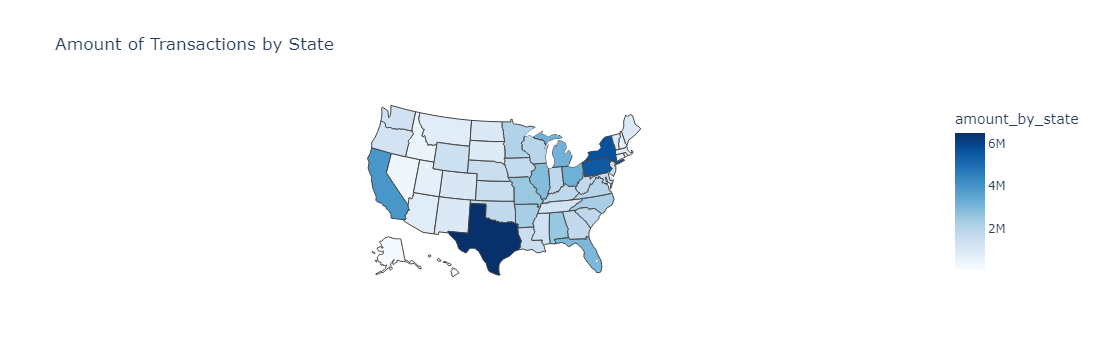

In [38]:
fig=px.choropleth(df_location, locations='state', locationmode='USA-states',color='amount_by_state',
                 hover_name='state', hover_data='amount_by_state', scope='usa',
                 color_continuous_scale='Blues', title='Amount of Transactions by State')

fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Amount of Transactions by State.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

### Credit Card Fraud Analysis 

#### Impact of Fraudulent Credit Card Transactions

##### Fraudulent Status Distribution

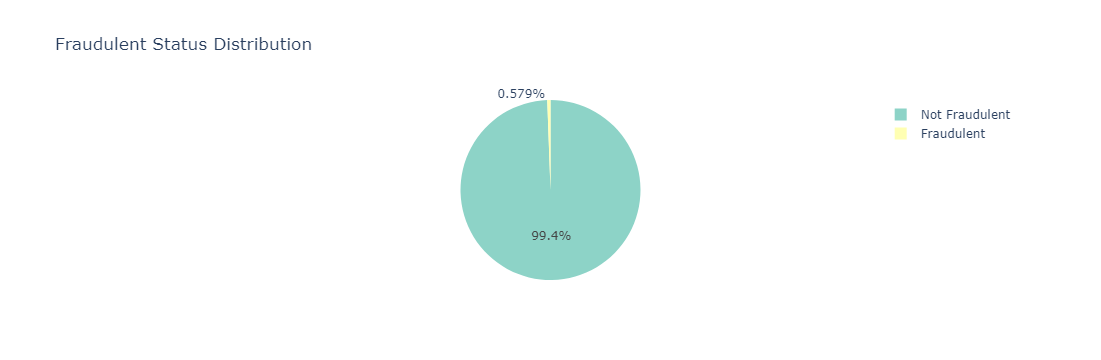

In [39]:
fraudcount=df['is_fraud'].value_counts()
fraudcount.index = fraudcount.index.map({0: 'Not Fraudulent', 1: 'Fraudulent'})
fig= px.pie(values=fraudcount, names=fraudcount.index, title="Fraudulent Status Distribution",
           color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Fraudulent Status Distribution.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Fraudulent Status Distribution - Amount

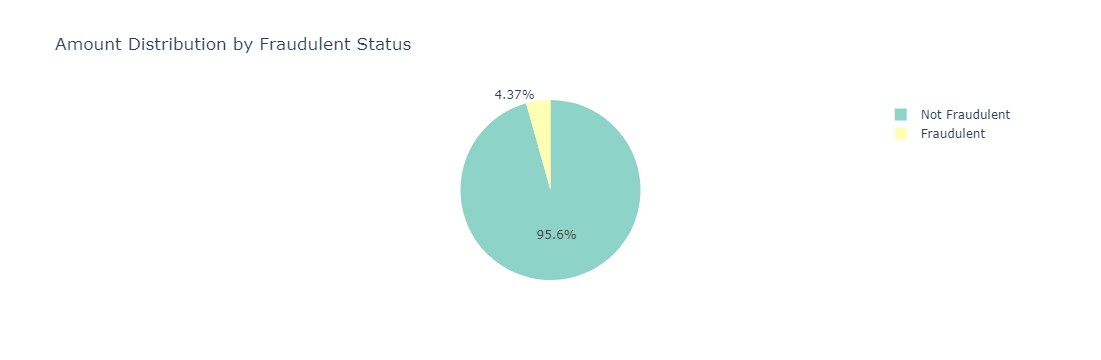

In [40]:
fraudsum=df.groupby('is_fraud')['amt'].sum().reset_index()
fraudsum['is_fraud'] = fraudsum['is_fraud'].replace({0: 'Not Fraudulent', 1: 'Fraudulent'})
fig= px.pie(fraudsum,values='amt', names='is_fraud', title="Amount Distribution by Fraudulent Status",
           color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Amount Distribution by Fraudulent Status.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

#### Fraudulent and Not-Fraudulent transactions

In [41]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


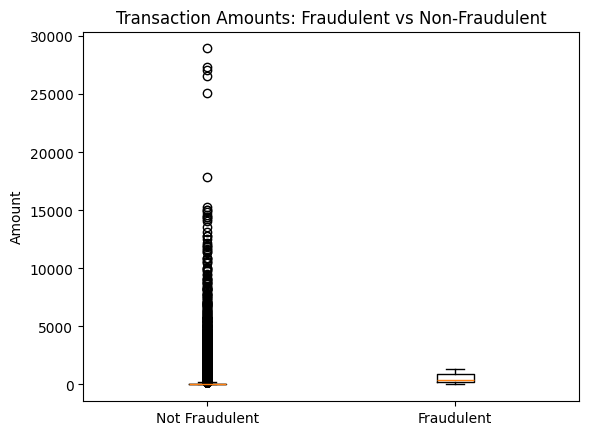

In [98]:
non_fraudulent = df[df['is_fraud'] == 0]['amt']
fraudulent = df[df['is_fraud'] == 1]['amt']
fig, ax = plt.subplots()
ax.boxplot([non_fraudulent, fraudulent], labels=['Not Fraudulent', 'Fraudulent'])
ax.set_title('Transaction Amounts: Fraudulent vs Non-Fraudulent')
ax.set_ylabel('Amount')
plt.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Transaction Amounts Fraudulent vs Non-Fraudulent.png'
savepath=os.path.join(imagepath,filename)
fig.savefig(savepath, format='png')

#### Filter the dataframe on fraudulent transactions

In [43]:
# df1 will be the not fraudulent transactions
df1=df[(df['is_fraud'])==1]
df1.shape

(7506, 27)

#### Histogram of fraudulent transactions

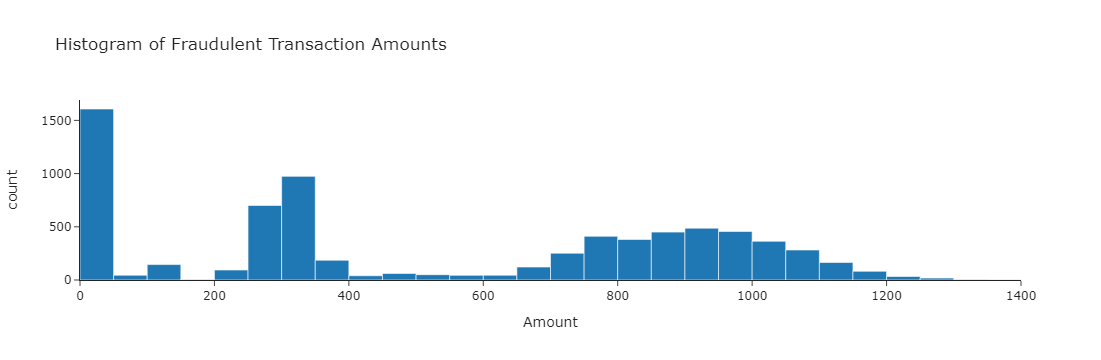

In [44]:
fig=px.histogram(df1, x='amt', title='Histogram of Fraudulent Transaction Amounts', nbins=28,template= 'simple_white', labels={'amt':'Amount'})
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Histogram of Fraudulent Transaction Amounts.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

### Sum of Transaction amounts by Month

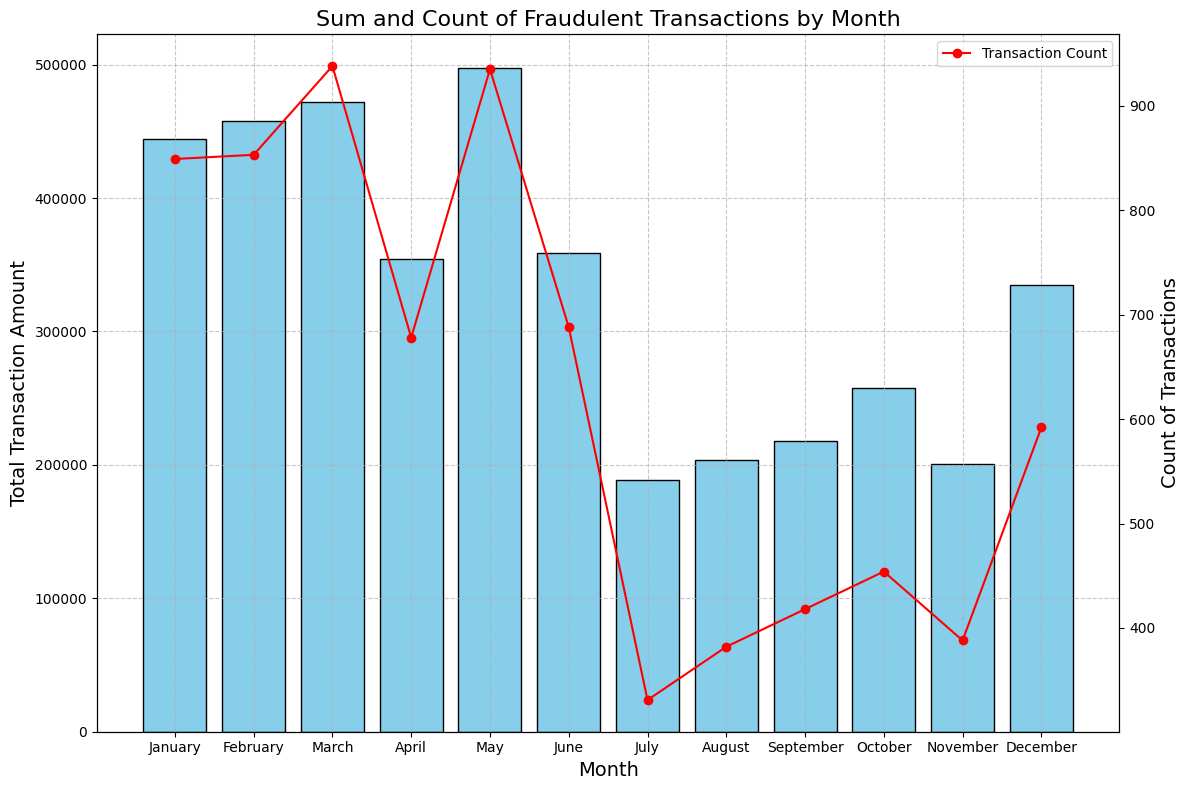

In [99]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_month = df1.groupby('month')['amt'].sum()
count_by_month = df1.groupby('month')['amt'].count()

# Define the correct order of days
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the series to ensure proper sorting
sum_by_month = sum_by_month.reindex(months_order)
count_by_month = count_by_month.reindex(months_order)

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_month.index, sum_by_month.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_month.index, count_by_month.values, marker='o', linestyle='-', color='red', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Fraudulent Transactions by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)

# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()


# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum of Fraudulent Transaction Amounts by Month.png')
plt.savefig(filename)


# Show the plot
plt.show()

### Sum of Fraudulent transactions by hour

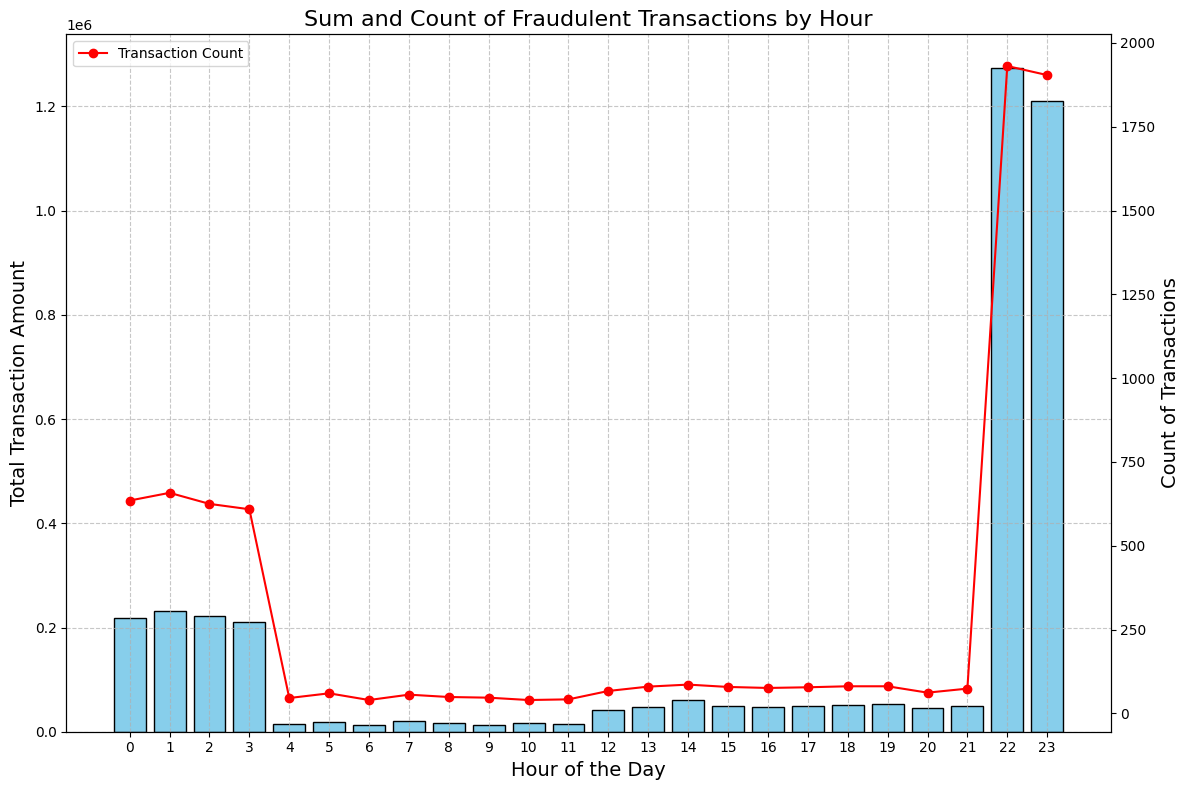

In [100]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_hour = df1.groupby('hour_transaction')['amt'].sum()
count_by_hour = df1.groupby('hour_transaction')['amt'].count()

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_hour.index, sum_by_hour.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_hour.index, count_by_hour.values, marker='o', linestyle='-', color='red', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Fraudulent Transactions by Hour', fontsize=16)
ax1.set_xlabel('Hour of the Day', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)

# Customize x-axis ticks
plt.xticks(range(24), fontsize=12)

# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()


# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum of Fraudulent Transaction Amounts by Hour.png')
plt.savefig(filename)


# Show the plot
plt.show()

### Sum of Fraudulent transactions by hour

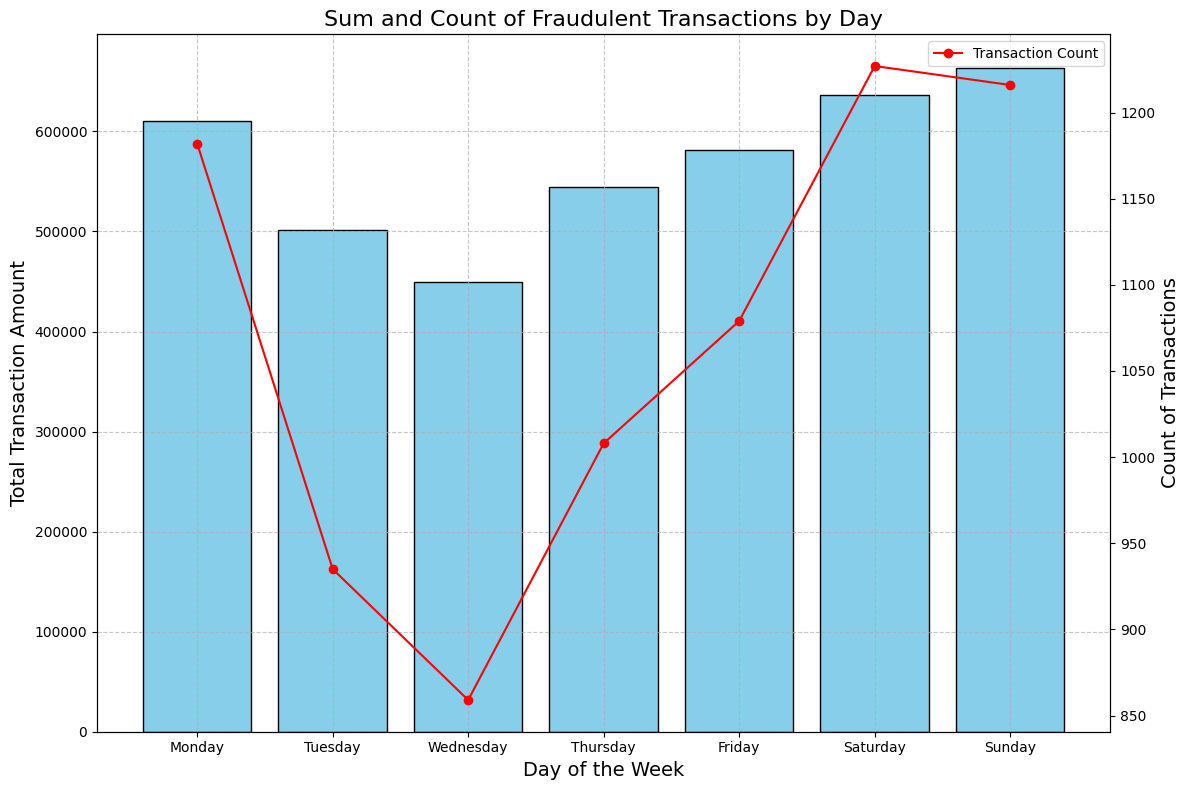

In [101]:
# Aggregate the sum of 'amt' by 'day_week'
sum_by_day = df1.groupby('day_week')['amt'].sum()
count_by_day = df1.groupby('day_week')['amt'].count()

# Define the correct order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the series to ensure proper sorting
sum_by_day = sum_by_day.reindex(days_order)
count_by_day = count_by_day.reindex(days_order)

# Create the bar chart
fig, ax1=plt.subplots(figsize=(12,8))

# Plot the bar chart in the primary y axis
bars=ax1.bar(sum_by_day.index, sum_by_day.values, color='skyblue', edgecolor='black',label='Sum of Amount')

# Create a secondary y axis
ax2=ax1.twinx()

# Plot the line chart in the secondary y axis
line=ax2.plot(count_by_day.index, count_by_day.values, marker='o', linestyle='-', color='red', label='Transaction Count')

# Add labels and title
ax1.set_title('Sum and Count of Fraudulent Transactions by Day', fontsize=16)
ax1.set_xlabel('Day of the Week', fontsize=14)
ax1.set_ylabel('Total Transaction Amount', fontsize=14)
ax2.set_ylabel('Count of Transactions', fontsize=14)


# Show grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
fig.tight_layout()

# Display legend
plt.legend()

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Sum and Count of Fraudulent Transactions by Day.png')
plt.savefig(filename)


# Show the plot
plt.show()


#### What are Fraudulent Credit Card transactions being used for?

##### Group by count of transactions

In [48]:
df_count_trans1=df1.groupby(['category'])['trans_num'].agg('nunique').reset_index()
df_count_trans1.sort_values(by=['trans_num'],ascending=False,inplace=True)
df_count_trans1

category  trans_num
4      grocery_pos       1743
11    shopping_net       1713
8         misc_net        915
12    shopping_pos        843
2    gas_transport        618
9         misc_pos        250
7        kids_pets        239
0    entertainment        233
10   personal_care        220
6             home        198
1      food_dining        151
3      grocery_net        134
5   health_fitness        133
13          travel        116

##### Rename categories

In [49]:
print(df_count_trans1['category'].unique())

['grocery_pos' 'shopping_net' 'misc_net' 'shopping_pos' 'gas_transport'
 'misc_pos' 'kids_pets' 'entertainment' 'personal_care' 'home'
 'food_dining' 'grocery_net' 'health_fitness' 'travel']


In [50]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [51]:
df_count_trans1['category']=df_count_trans1['category'].replace(renamedcategories)

##### Bar chart of Transactions count

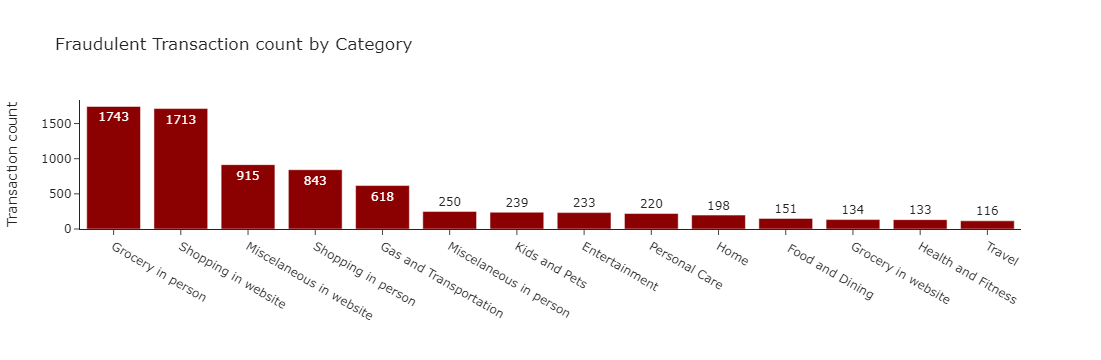

In [52]:
fig=px.bar(df_count_trans1, x='category', y='trans_num',text_auto=True, 
           labels={'category':'', 'trans_num':'Transaction count'},
          title= 'Fraudulent Transaction count by Category',template= 'simple_white',color_discrete_sequence=['darkred'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Fraudulent Transaction count by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Group by sum of transactions

In [53]:
df_sum_trans1=df1.groupby(['category'])['amt'].agg('sum').reset_index()
df_sum_trans1.sort_values(by=['amt'],ascending=False,inplace=True)
df_sum_trans1

category         amt
11    shopping_net  1711723.71
12    shopping_pos   739245.09
8         misc_net   729266.76
4      grocery_pos   543797.90
0    entertainment   117323.79
9         misc_pos    54571.02
6             home    50971.66
1      food_dining    18131.62
2    gas_transport     7594.11
10   personal_care     5757.52
7        kids_pets     4331.08
5   health_fitness     2693.04
3      grocery_net     1629.82
13          travel     1051.49

##### Rename categories

In [54]:
print(df_sum_trans1['category'].unique())

['shopping_net' 'shopping_pos' 'misc_net' 'grocery_pos' 'entertainment'
 'misc_pos' 'home' 'food_dining' 'gas_transport' 'personal_care'
 'kids_pets' 'health_fitness' 'grocery_net' 'travel']


In [55]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [56]:
df_sum_trans1['category']=df_sum_trans1['category'].replace(renamedcategories)

##### Bar chart of Sum of transactions

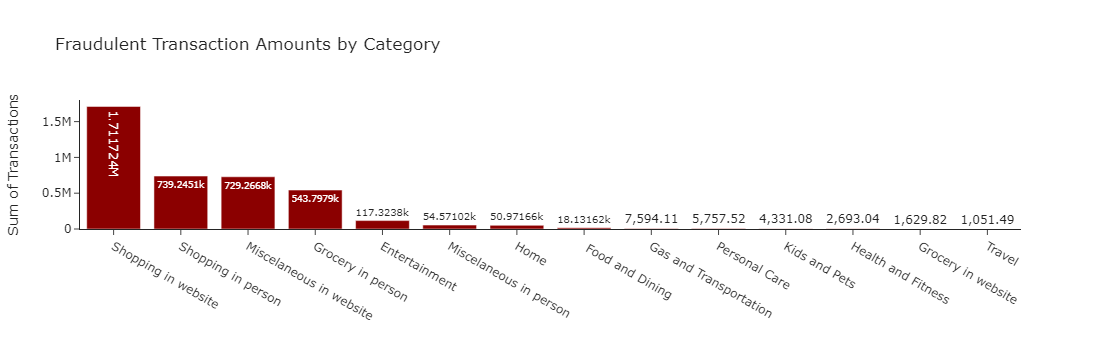

In [57]:
fig=px.bar(df_sum_trans1, x='category', y='amt',text_auto=True, 
           labels={'category':'', 'amt':'Sum of Transactions'},
          title= 'Fraudulent Transaction Amounts by Category',template= 'simple_white',color_discrete_sequence=['darkred'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Fraudulent Transaction Amounts by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

##### Group by sum and count

In [58]:
df_avg1=df1.groupby('category').agg({'amt':'sum','trans_num':'nunique'}).reset_index()
df_avg1['Average Amount']=df_avg1['amt']/df_avg1['trans_num']
df_avg1.sort_values(by=['Average Amount'],ascending=False,inplace=True)
df_avg1

category         amt  trans_num  Average Amount
11    shopping_net  1711723.71       1713      999.254939
12    shopping_pos   739245.09        843      876.921815
8         misc_net   729266.76        915      797.012852
0    entertainment   117323.79        233      503.535579
4      grocery_pos   543797.90       1743      311.989616
6             home    50971.66        198      257.432626
9         misc_pos    54571.02        250      218.284080
1      food_dining    18131.62        151      120.076954
10   personal_care     5757.52        220       26.170545
5   health_fitness     2693.04        133       20.248421
7        kids_pets     4331.08        239       18.121674
2    gas_transport     7594.11        618       12.288204
3      grocery_net     1629.82        134       12.162836
13          travel     1051.49        116        9.064569

##### Rename categories

In [59]:
renamedcategories={'gas_transport':'Gas and Transportation',
                'home':'Home',
                'grocery_pos':'Grocery in person',
                'shopping_pos':'Shopping in person',
                'kids_pets': 'Kids and Pets',
                'shopping_net': 'Shopping in website',
                'entertainment': 'Entertainment',
                'food_dining' :' Food and Dining',
                'personal_care': 'Personal Care',
                'health_fitness': 'Health and Fitness',
                'misc_pos': 'Miscelaneous in person',
                'misc_net': 'Miscelaneous in website',
                'grocery_net': 'Grocery in website',
                'travel': 'Travel'}

In [60]:
df_avg1['category']=df_avg1['category'].replace(renamedcategories)

##### Bar chart of Sum of transactions

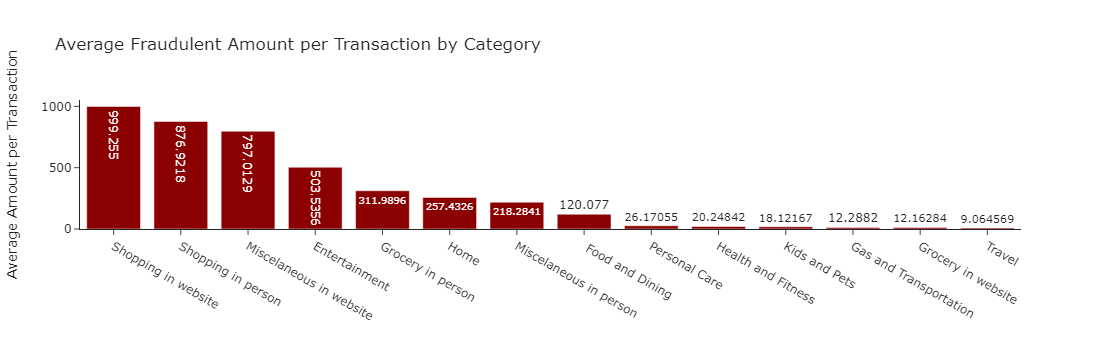

In [61]:
fig=px.bar(df_avg1, x='category', y='Average Amount',text_auto=True, 
           labels={'category':'', 'Average Amount':'Average Amount per Transaction'},
          title= 'Average Fraudulent Amount per Transaction by Category',template= 'simple_white',color_discrete_sequence=['darkred'])
fig.show()
imagepath=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename='Average Fraudulent Amount per Transaction by Category.png'
savepath=os.path.join(imagepath,filename)
pio.write_image(fig,savepath, format='png')

## Machine Learning

#### Drop unnecessary columns from initial DF

In [62]:
df=df.drop(df.columns[0],axis=1)

In [63]:
column_headers = df.columns.tolist()
print(column_headers)

['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'day_week', 'month', 'hour_transaction']


#### Create a duplicate of the initial DF

In [64]:
dfdup=df

#### Drop columns not useful for prediction

In [65]:
dfdup=dfdup.drop(['trans_date_trans_time', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time'], axis=1)

#### Group infrequent categories into 'Other' for high-cardinality columns

In [66]:
def reduce_cardinality(column, threshold=100):
    counts = dfdup[column].value_counts() 
    categories_to_keep = counts[counts > threshold].index
    dfdup[column] = dfdup[column].apply(lambda x: x if x in categories_to_keep else 'Other')

high_cardinality_columns = ['merchant', 'job', 'city']
for col in high_cardinality_columns:
    reduce_cardinality(col)

In [67]:
label_encoders = {}
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job', 'day_week', 'month']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dfdup[column] = label_encoders[column].fit_transform(dfdup[column])

#### Create the X and y datraframes

In [68]:
X=dfdup.drop('is_fraud',axis=1)
y=dfdup['is_fraud']

#### Split the dataframe inot training and testing

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#### Initialize Decision Tree Classifier

In [70]:
clf=DecisionTreeClassifier(random_state=42)

#### Train the model

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Make predictions

In [72]:
y_pred=clf.predict(X_test)

#### Evaluate model

In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9970128765073791

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.74      0.76      0.75      2285

    accuracy                           1.00    389003
   macro avg       0.87      0.88      0.87    389003
weighted avg       1.00      1.00      1.00    389003



#### Get feature importance

In [74]:
feature_importance = clf.feature_importances_

#### Create a dataframe for visualization

In [75]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#### Plot the top 10 most important features

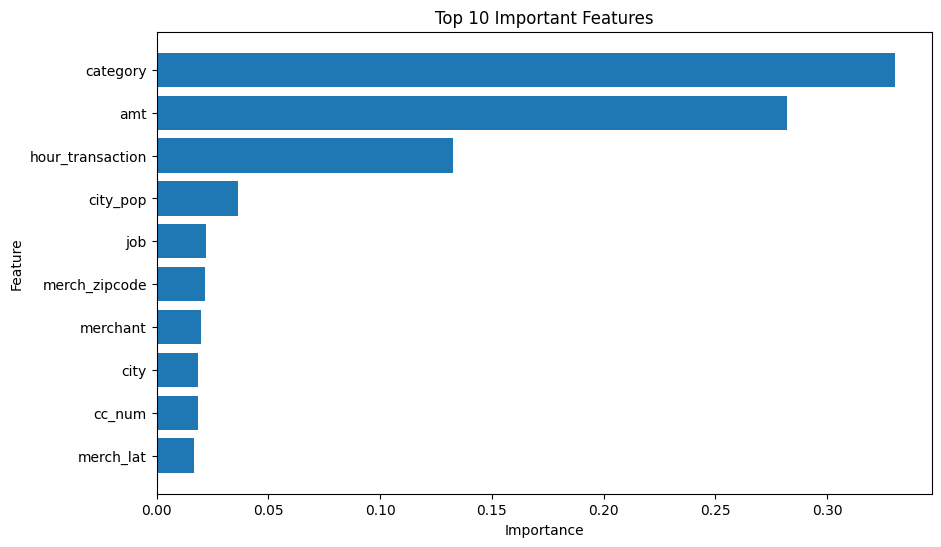

In [109]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Top10 Important Features.png')
plt.savefig(filename)


# Show the plot
plt.show()


#### Plot Decision Tree Model

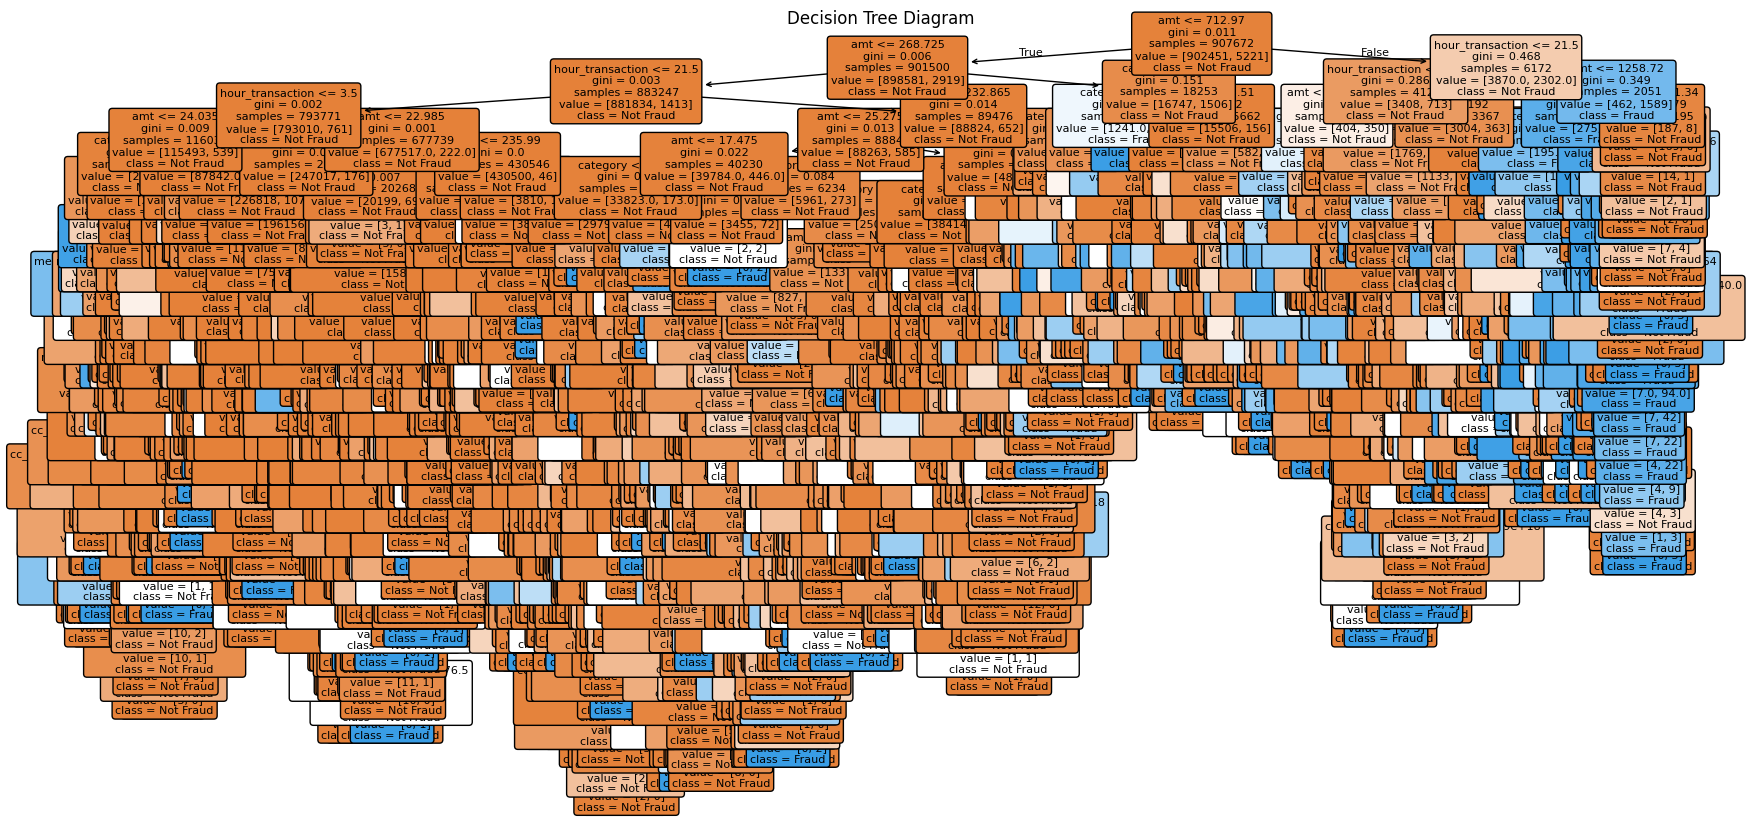

In [77]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          filled=True, 
          rounded=True, 
          fontsize=8)

plt.title('Decision Tree Diagram')
plt.show()

#### Display decision tree rules

In [78]:
tree_rules = export_text(clf, feature_names=list(X.columns), max_depth=4)  # Adjust max_depth for more detail
print(tree_rules)

|--- amt <= 712.97
|   |--- amt <= 268.73
|   |   |--- hour_transaction <= 21.50
|   |   |   |--- hour_transaction <= 3.50
|   |   |   |   |--- amt <= 24.04
|   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |--- amt >  24.04
|   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- hour_transaction >  3.50
|   |   |   |   |--- amt <= 22.98
|   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |--- amt >  22.98
|   |   |   |   |   |--- truncated branch of depth 19
|   |   |--- hour_transaction >  21.50
|   |   |   |--- amt <= 232.87
|   |   |   |   |--- amt <= 25.28
|   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |   |--- amt >  25.28
|   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- amt >  232.87
|   |   |   |   |--- category <= 6.50
|   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |--- category >  6.50
|   |   |   |   |   |--- class: 0
|   |--- amt >  268.73
|   |   |--- catego

### Recursive Feature Elimination RFE

In [79]:
# Initialize the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42)

# Recursive Feature Elimination
rfe = RFE(estimator=clf2, n_features_to_select=3)
rfe.fit(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_]

print("Top 3 selected features using RFE:")
print(selected_features_rfe)

Top 3 selected features using RFE:
Index(['category', 'amt', 'hour_transaction'], dtype='object')


### Confusion Matrix

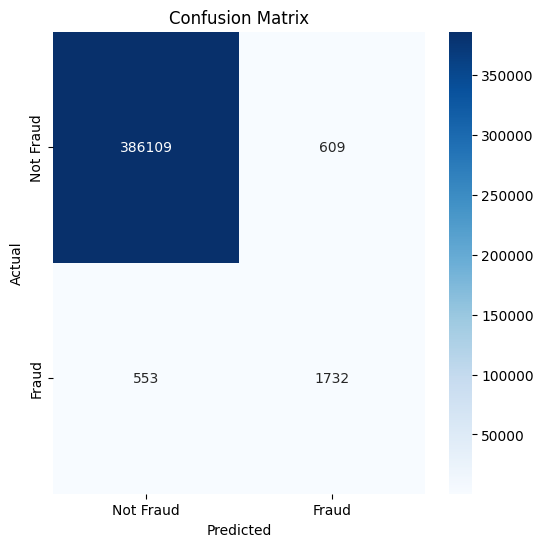

In [106]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'Confusion Matrix.png')
plt.savefig(filename)


# Show the plot
plt.show()

### ROC Curve and AUC (Area Under the Curve)

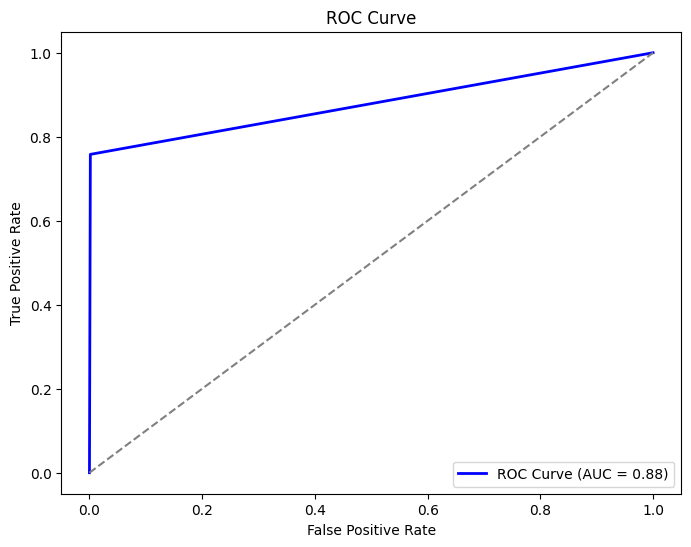

In [105]:
y_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Save plot
folder=r'C:\Users\Jaime Andres Suarez\Data Projects\Credit Card Transactions\Visualizations'
filename=os.path.join(folder, 'ROC Curve.png')
plt.savefig(filename)


# Show the plot
plt.show()

### Correlation Analysis

In [82]:
correlation = dfdup.corr()['is_fraud'].sort_values(ascending=False)

print("Features most positively correlated with fraud:")
print(correlation.head(10))

print("\nFeatures most negatively correlated with fraud:")
print(correlation.tail(10))

Features most positively correlated with fraud:
is_fraud            1.000000
amt                 0.219404
category            0.020205
hour_transaction    0.013799
gender              0.007642
month               0.004475
day_week            0.002158
city_pop            0.002136
lat                 0.001894
merch_lat           0.001741
Name: is_fraud, dtype: float64

Features most negatively correlated with fraud:
merch_lat        0.001741
state            0.001730
merch_long       0.001721
long             0.001721
job              0.001616
city             0.001475
merchant        -0.000536
cc_num          -0.000981
zip             -0.002162
merch_zipcode   -0.002992
Name: is_fraud, dtype: float64


### Random Forest Optimization

#### Define the hyperparameter grid

param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],         # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Whether to use bootstrap samples when building trees
}

#### Initialize and Run GridSearchCV

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

#### Extract the Best Model and Evaluate

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the optimized model on the test set
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))